In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os

In [4]:
path = "/Users/davidkorn/Data Science/Baby Names/names"

In [5]:
data = []
for year in range(1880, 2022):
    df = pd.read_csv(os.path.join(path, f'yob{year}.txt'), names=['name', 'gender', 'count'])
    df['year'] = year
    data.append(df)
    
df = pd.concat(data, axis=0, ignore_index=True)
df.shape

(2052781, 4)

In [6]:
df["last"] = df["name"].str[-1]
df.head(3)

,name,gender,count,year,last
0,Mary,F,7065,1880,y
1,Anna,F,2604,1880,a
2,Emma,F,2003,1880,a


<AxesSubplot:>

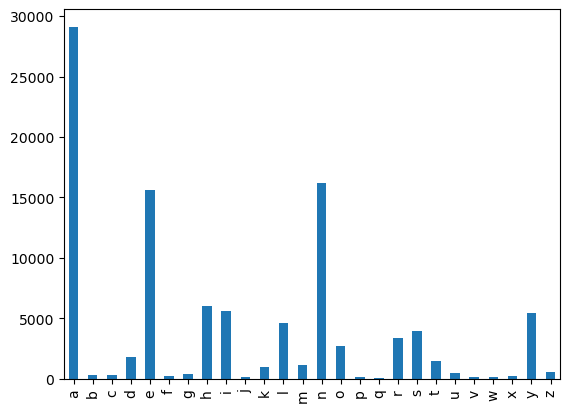

In [8]:
unique_names = df.groupby(["name"])["last"].first()
unique_names.head(3)
unique_names.value_counts().sort_index().plot.bar()

In [9]:
e_times = df[df["last"] == "e"].groupby("year")["last"].count()
e_times.head(3)

year
1880    490
1881    484
1882    538
Name: last, dtype: int64

<AxesSubplot:xlabel='year'>

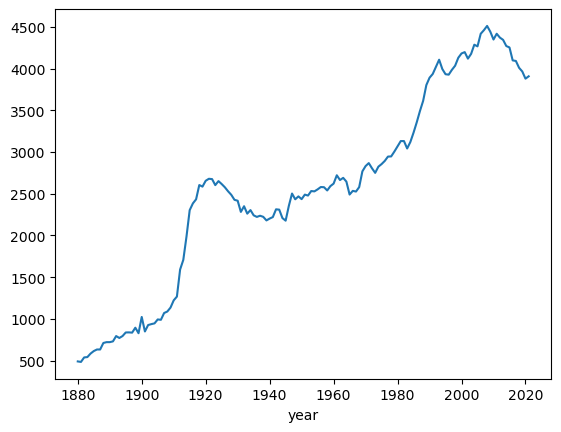

In [13]:
e_times.plot()

In [16]:
g = df.groupby(['last', 'year'])['name'].count()
crosstable = g.unstack(level=0)

crosstable.head(3)

last,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
year,,,,,,,,,,,,,,,,,,,,,
1880,450.0,7.0,7.0,93.0,490.0,7.0,9.0,60.0,7.0,NaN,...,NaN,89.0,125.0,76.0,5.0,1.0,7.0,4.0,148.0,4.0
1881,432.0,6.0,8.0,85.0,484.0,5.0,13.0,59.0,6.0,NaN,...,NaN,83.0,116.0,78.0,4.0,1.0,7.0,5.0,142.0,2.0
1882,478.0,7.0,8.0,96.0,538.0,8.0,10.0,70.0,6.0,NaN,...,NaN,87.0,124.0,83.0,3.0,1.0,8.0,5.0,167.0,4.0


<AxesSubplot:xlabel='year'>

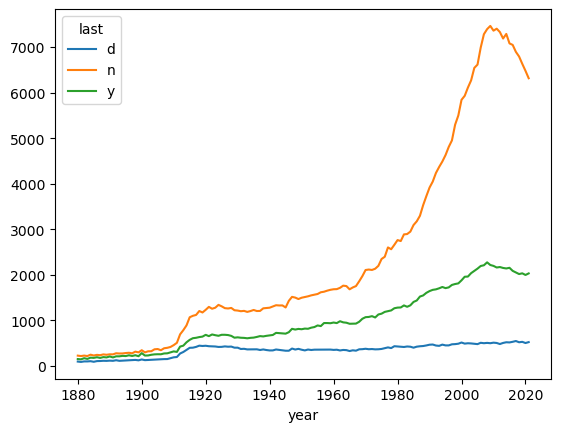

In [17]:
crosstable[["d", "n", "y"]].plot()

<AxesSubplot:xlabel='year'>

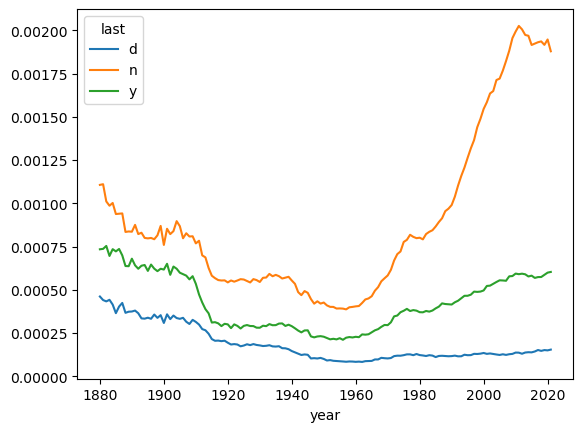

In [18]:
total_year = df.groupby("year")["count"].sum()
c_normal = (crosstable.transpose() / total_year).transpose()  # division is column-based


c_normal[["d", "n", "y"]].plot()